In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class ProcessPitcherData:
    def load_pitcher_data(self, pitcher_data_file):
        # load pitcher data
        pitcher_data = pd.read_csv(pitcher_data_file)
        return pitcher_data

In [3]:
# file path for pitcher data
pitcher_data_file = 'fangraphs_season_level.csv'

# create instance of ProcessPitcherData class
process_pitcher_data = ProcessPitcherData()

# load pitcher data
pitcher_data = process_pitcher_data.load_pitcher_data(pitcher_data_file)

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
0,18,491703,NeftalÃ­ Feliz,Neftali Feliz,R,2021,33,- - -,RP,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.316418,95.123881,95.873134
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,103.100000,NaN,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222
2,1159,461865,Andrew Romine,Andrew Romine,R,2021,35,CHC,RP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.925000,108.425000,99.200000
3,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594
4,1247,493603,Adam Ottavino,Adam Ottavino,R,2021,35,BOS,RP,69,...,66.583333,NaN,NaN,NaN,NaN,NaN,NaN,116.269527,94.625394,102.238617


In [4]:
print(f"Pitcher data shape: {pitcher_data.shape}")

# 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

#
print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (3325, 308)
 Number of starting pitchers(1146, 308)
 Number of relief pitchers(2179, 308)


In [5]:
# Filter data to 2023 season
pitcher_data = pitcher_data[pitcher_data['Season'] == 2023]

# Filter to only include number of innings pitched
pitcher_data = pitcher_data[pitcher_data['IP'] > 50]

print(pitcher_data.shape)


(331, 308)


In [6]:
print(f"Pitcher data shape: {pitcher_data.shape}")

# 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

#
print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (331, 308)
 Number of starting pitchers(176, 308)
 Number of relief pitchers(155, 308)


In [7]:
#
pitcher_data.sort_values('ERA', ascending=True)[['Name', 'ERA']].head(10)

,Name,ERA
1160,Chris Martin,1.051949
1454,Brusdar Graterol,1.239797
2047,Josh Hader,1.278107
1470,FÃ©lix Bautista,1.475410
2054,Tim Mayza,1.518751
1277,Devin Williams,1.534090
1159,Hector Neris,1.712196
1296,Bryan Abreu,1.750000
2144,Tom Cosgrove,1.753248
2039,Hoby Milner,1.818654


In [8]:
# Filter column name containing Gerrit Cole
gerrit_cole = pitcher_data[pitcher_data['Name'].str.contains('Gerrit Cole')]
gerrit_cole[['Name', 'ERA']]

,Name,ERA
2769,Gerrit Cole,2.626794


In [9]:
# Filter column name containing ohtani

ohtani_data = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]
ohtani_data

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
2867,19755,660271,Shohei Ohtani,Shohei Ohtani,R,2023,28,LAA,SP,23,...,88.117933,130.545522,93.112687,106.797761,NaN,NaN,NaN,120.518243,95.504871,102.865855


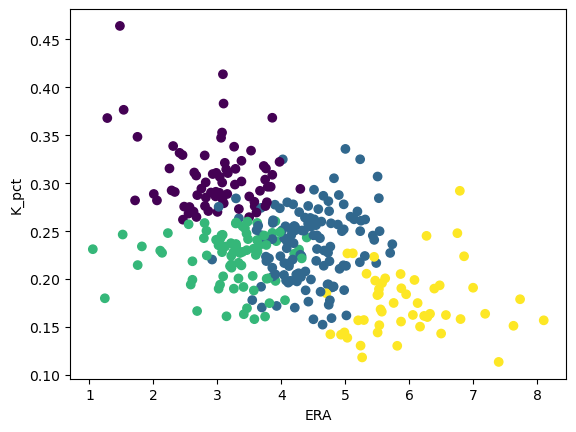

In [10]:
features = pitcher_data[['ERA', 'K_pct', 'WHIP']]

# Standardize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Create a kmeans model on our data, using k clusters. Random_state helps ensure that the algorithm returns the same results each time.
model = KMeans(n_clusters=4, random_state=42)

# Use the fit method to fit the model to the features from the dataframe
pitcher_data['cluster'] = model.fit_predict(scaled_features)

# Create a scatter plot of the data, coloring by cluster
plt.scatter(pitcher_data['ERA'], pitcher_data['K_pct'], c=pitcher_data['cluster'], cmap='viridis')
plt.xlabel('ERA')
plt.ylabel('K_pct')

# Display the plot
plt.show()

In [11]:
pitcher_data[['Name', 'cluster']].head()



,Name,cluster
1100,Adam Ottavino,2
1111,Ryan Brasier,2
1112,Huascar Brazoban,1
1115,JosÃ© Cisnero,1
1116,Craig Kimbrel,0


In [12]:
# Print value counts for each cluster
print(pitcher_data['cluster'].value_counts())

1    129
2     80
0     71
3     51
Name: cluster, dtype: int64


In [13]:
ohtani_data = pitcher_data[pitcher_data['Name'].str.contains('Ohtani')]
ohtani_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2867,Shohei Ohtani,3.136364,0.3145,1.060606,0


In [14]:
gerrit_cole_data = pitcher_data[pitcher_data['Name'].str.contains('Gerrit')]

gerrit_cole_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
2769,Gerrit Cole,2.626794,0.2704,0.980861,0


In [15]:
blake_snell_data = pitcher_data[pitcher_data['Name'].str.contains('Blake Snell')]
blake_snell_data[['Name', 'ERA', 'K_pct', 'WHIP', 'cluster']]

,Name,ERA,K_pct,WHIP,cluster
3230,Blake Snell,2.25,0.3154,1.188889,0


In [16]:
cluster_4_df = pitcher_data[pitcher_data['cluster'] == 0]

cluster_4_df.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,cluster
1116,6655,518886,Craig Kimbrel,Craig Kimbrel,R,2023,35,PHI,RP,71,...,NaN,NaN,NaN,NaN,NaN,NaN,125.195179,101.750893,114.085893,0
1124,7005,519151,Ryan Pressly,Ryan Pressly,R,2023,34,HOU,RP,65,...,NaN,NaN,NaN,NaN,NaN,NaN,155.627344,102.039844,117.085352,0
1134,8241,502085,David Robertson,David Robertson,R,2023,38,- - -,RP,62,...,NaN,NaN,NaN,NaN,NaN,NaN,124.911794,97.372018,105.078505,0
1136,9073,489446,Kirby Yates,Kirby Yates,R,2023,36,ATL,RP,61,...,129.639490,90.772824,89.263907,NaN,NaN,NaN,104.439394,94.179451,91.241951,0
1159,11804,593576,Hector Neris,Hector Neris,R,2023,34,HOU,RP,71,...,103.784127,99.111429,103.281905,NaN,NaN,NaN,99.473993,98.831685,96.502656,0


In [17]:
cluster_4_df.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role']].head(20)

,Name,ERA,Role
2047,Josh Hader,1.278107,RP
1470,FÃ©lix Bautista,1.475410,RP
1277,Devin Williams,1.534090,RP
1159,Hector Neris,1.712196,RP
1296,Bryan Abreu,1.750000,RP
1395,David Bednar,2.004952,RP
1332,Evan Phillips,2.054349,RP
3230,Blake Snell,2.250000,SP
2808,Brandon Woodruff,2.283582,SP
2074,Tanner Scott,2.307692,RP


In [18]:
rp_cluster_4 = cluster_4_df[cluster_4_df['Role'] == 'RP']
# Print shape of relief pitcher cluster
print(rp_cluster_4.shape)
rp_cluster_4.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role']].head(10)

(51, 309)


,Name,ERA,Role
2047,Josh Hader,1.278107,RP
1470,FÃ©lix Bautista,1.475410,RP
1277,Devin Williams,1.534090,RP
1159,Hector Neris,1.712196,RP
1296,Bryan Abreu,1.750000,RP
1395,David Bednar,2.004952,RP
1332,Evan Phillips,2.054349,RP
2074,Tanner Scott,2.307692,RP
1373,Ian Hamilton,2.333333,RP
1318,Jeff Hoffman,2.407645,RP


In [19]:
sp_cluster_4 = cluster_4_df[cluster_4_df['Role'] == 'SP']
# Print shape of starting pitcher cluster
print(sp_cluster_4.shape)
sp_cluster_4.sort_values(by='ERA', ascending=True)[['Name', 'ERA', 'Role']].head(20)

(20, 309)


,Name,ERA,Role
3230,Blake Snell,2.250000,SP
2808,Brandon Woodruff,2.283582,SP
3213,Clayton Kershaw,2.460753,SP
2769,Gerrit Cole,2.626794,SP
3295,Cole Ragans,2.637208,SP
3297,Tarik Skubal,2.800831,SP
2992,Kodai Senga,2.975958,SP
2867,Shohei Ohtani,3.136364,SP
2979,Eury PÃ©rez,3.153286,SP
2783,Kevin Gausman,3.162162,SP
